In [24]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [14]:
#importing the dataset from socialnetwork set

data = pd.read_csv('Social_Network_Ads.csv')
X    = data.iloc[:, [2,3]].values
Y    = data.iloc[:, 4].values

In [15]:
#splitting the data into train and test
X_train,X_test,y_train,y_test = train_test_split(X,Y, test_size = 20 , random_state = 25)

In [16]:
# standardising the data to feed the data to SVM

X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [17]:
#Building the SVM linear model

model = SVC(kernel =  'linear', random_state =  20)
model.fit(X_train, y_train)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=20, shrinking=True,
  tol=0.001, verbose=False)

In [21]:

# generating the predictions from test data set

y_pred = model.predict(X_test)

In [22]:
#formating the confusion matrix

cm = confusion_matrix(y_test,y_pred)

In [23]:
print(cm)

[[12  2]
 [ 2  4]]


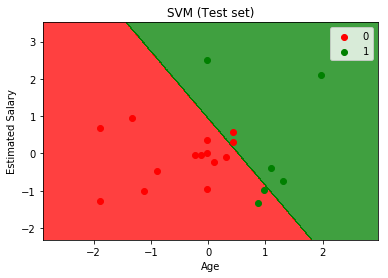

In [26]:
## Visualising the test set results

# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()